## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  73.747746   806.063456  0.630828  4.483067  1.489012
1  50.869351   988.573436  0.670355  7.018175  1.544848
2  95.168387   525.056783  0.064823  6.018532  0.309465
3  38.452650  1187.641874  0.435952  6.374514  1.371440
4   2.308919  1267.673234  0.136470  7.164469  1.500377


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0776355	total: 62.5ms	remaining: 1m 2s
1:	learn: 1.0658272	total: 63ms	remaining: 31.4s
2:	learn: 1.0562099	total: 63.4ms	remaining: 21.1s
3:	learn: 1.0439387	total: 64ms	remaining: 15.9s
4:	learn: 1.0312649	total: 64.4ms	remaining: 12.8s
5:	learn: 1.0199606	total: 66.6ms	remaining: 11s
6:	learn: 1.0087034	total: 67ms	remaining: 9.5s
7:	learn: 0.9983591	total: 67.4ms	remaining: 8.36s
8:	learn: 0.9861968	total: 67.9ms	remaining: 7.47s
9:	learn: 0.9731638	total: 68.3ms	remaining: 6.76s
10:	learn: 0.9639398	total: 68.7ms	remaining: 6.18s
11:	learn: 0.9521893	total: 69.1ms	remaining: 5.69s
12:	learn: 0.9419442	total: 69.5ms	remaining: 5.28s
13:	learn: 0.9320067	total: 69.9ms	remaining: 4.92s
14:	learn: 0.9209244	total: 70.3ms	remaining: 4.61s
15:	learn: 0.9116865	total: 70.8ms	remaining: 4.35s
16:	learn: 0.9014217	total: 71.2ms	remaining: 4.12s
17:	learn: 0.8913221	total: 71.6ms	remaining: 3.9s
18:	learn: 0.8839073	total: 72ms	remaining: 3.72s
19:	learn: 0.8744792	total: 72.4ms

150:	learn: 0.3111401	total: 135ms	remaining: 757ms
151:	learn: 0.3093609	total: 137ms	remaining: 765ms
152:	learn: 0.3078731	total: 138ms	remaining: 762ms
153:	learn: 0.3065328	total: 138ms	remaining: 759ms
154:	learn: 0.3053416	total: 139ms	remaining: 755ms
155:	learn: 0.3035839	total: 140ms	remaining: 755ms
156:	learn: 0.3021616	total: 140ms	remaining: 752ms
157:	learn: 0.3007167	total: 140ms	remaining: 748ms
158:	learn: 0.2993235	total: 141ms	remaining: 745ms
159:	learn: 0.2980897	total: 141ms	remaining: 742ms
160:	learn: 0.2968229	total: 142ms	remaining: 738ms
161:	learn: 0.2952720	total: 142ms	remaining: 735ms
162:	learn: 0.2936689	total: 143ms	remaining: 732ms
163:	learn: 0.2926117	total: 143ms	remaining: 728ms
164:	learn: 0.2915888	total: 143ms	remaining: 725ms
165:	learn: 0.2899915	total: 146ms	remaining: 735ms
166:	learn: 0.2891711	total: 147ms	remaining: 731ms
167:	learn: 0.2873399	total: 147ms	remaining: 728ms
168:	learn: 0.2866344	total: 147ms	remaining: 725ms
169:	learn: 

234:	learn: 0.2315346	total: 184ms	remaining: 600ms
235:	learn: 0.2310724	total: 185ms	remaining: 600ms
236:	learn: 0.2304638	total: 186ms	remaining: 598ms
237:	learn: 0.2299626	total: 186ms	remaining: 596ms
238:	learn: 0.2295447	total: 187ms	remaining: 595ms
239:	learn: 0.2291173	total: 187ms	remaining: 593ms
240:	learn: 0.2287387	total: 188ms	remaining: 591ms
241:	learn: 0.2278952	total: 188ms	remaining: 589ms
242:	learn: 0.2274999	total: 188ms	remaining: 587ms
243:	learn: 0.2268637	total: 189ms	remaining: 585ms
244:	learn: 0.2264500	total: 190ms	remaining: 584ms
245:	learn: 0.2259870	total: 190ms	remaining: 582ms
246:	learn: 0.2256586	total: 190ms	remaining: 580ms
247:	learn: 0.2248882	total: 191ms	remaining: 579ms
248:	learn: 0.2245299	total: 191ms	remaining: 577ms
249:	learn: 0.2242466	total: 192ms	remaining: 576ms
250:	learn: 0.2237747	total: 192ms	remaining: 574ms
251:	learn: 0.2231814	total: 193ms	remaining: 572ms
252:	learn: 0.2228476	total: 193ms	remaining: 570ms
253:	learn: 

399:	learn: 0.1612490	total: 282ms	remaining: 423ms
400:	learn: 0.1611467	total: 283ms	remaining: 422ms
401:	learn: 0.1610463	total: 286ms	remaining: 426ms
402:	learn: 0.1605785	total: 287ms	remaining: 425ms
403:	learn: 0.1602195	total: 287ms	remaining: 424ms
404:	learn: 0.1600539	total: 288ms	remaining: 423ms
405:	learn: 0.1594408	total: 288ms	remaining: 422ms
406:	learn: 0.1586324	total: 289ms	remaining: 421ms
407:	learn: 0.1581815	total: 289ms	remaining: 419ms
408:	learn: 0.1576907	total: 289ms	remaining: 418ms
409:	learn: 0.1572503	total: 290ms	remaining: 417ms
410:	learn: 0.1564671	total: 291ms	remaining: 416ms
411:	learn: 0.1561235	total: 291ms	remaining: 415ms
412:	learn: 0.1556975	total: 291ms	remaining: 414ms
413:	learn: 0.1548725	total: 292ms	remaining: 413ms
414:	learn: 0.1544616	total: 292ms	remaining: 412ms
415:	learn: 0.1541223	total: 293ms	remaining: 411ms
416:	learn: 0.1532817	total: 293ms	remaining: 410ms
417:	learn: 0.1528932	total: 294ms	remaining: 409ms
418:	learn: 

463:	learn: 0.1356486	total: 331ms	remaining: 383ms
464:	learn: 0.1355827	total: 332ms	remaining: 382ms
465:	learn: 0.1351257	total: 332ms	remaining: 381ms
466:	learn: 0.1344994	total: 333ms	remaining: 380ms
467:	learn: 0.1340133	total: 334ms	remaining: 379ms
468:	learn: 0.1336198	total: 334ms	remaining: 378ms
469:	learn: 0.1333058	total: 334ms	remaining: 377ms
470:	learn: 0.1331874	total: 335ms	remaining: 376ms
471:	learn: 0.1325787	total: 337ms	remaining: 377ms
472:	learn: 0.1320285	total: 337ms	remaining: 376ms
473:	learn: 0.1315872	total: 338ms	remaining: 375ms
474:	learn: 0.1308574	total: 338ms	remaining: 374ms
475:	learn: 0.1301800	total: 338ms	remaining: 373ms
476:	learn: 0.1297101	total: 339ms	remaining: 372ms
477:	learn: 0.1292491	total: 339ms	remaining: 371ms
478:	learn: 0.1291929	total: 340ms	remaining: 369ms
479:	learn: 0.1288019	total: 340ms	remaining: 368ms
480:	learn: 0.1282292	total: 341ms	remaining: 367ms
481:	learn: 0.1275360	total: 341ms	remaining: 366ms
482:	learn: 

595:	learn: 0.0875675	total: 434ms	remaining: 294ms
596:	learn: 0.0875034	total: 438ms	remaining: 296ms
597:	learn: 0.0872312	total: 439ms	remaining: 295ms
598:	learn: 0.0868295	total: 439ms	remaining: 294ms
599:	learn: 0.0864785	total: 439ms	remaining: 293ms
600:	learn: 0.0862432	total: 440ms	remaining: 292ms
601:	learn: 0.0859984	total: 440ms	remaining: 291ms
602:	learn: 0.0857565	total: 441ms	remaining: 290ms
603:	learn: 0.0855472	total: 441ms	remaining: 289ms
604:	learn: 0.0853209	total: 442ms	remaining: 289ms
605:	learn: 0.0850503	total: 442ms	remaining: 288ms
606:	learn: 0.0848197	total: 443ms	remaining: 287ms
607:	learn: 0.0846013	total: 443ms	remaining: 286ms
608:	learn: 0.0845406	total: 444ms	remaining: 285ms
609:	learn: 0.0842750	total: 444ms	remaining: 284ms
610:	learn: 0.0840521	total: 444ms	remaining: 283ms
611:	learn: 0.0838621	total: 445ms	remaining: 282ms
612:	learn: 0.0836361	total: 445ms	remaining: 281ms
613:	learn: 0.0833804	total: 446ms	remaining: 281ms
614:	learn: 

668:	learn: 0.0713167	total: 475ms	remaining: 235ms
669:	learn: 0.0712298	total: 475ms	remaining: 234ms
670:	learn: 0.0709347	total: 476ms	remaining: 233ms
671:	learn: 0.0708494	total: 476ms	remaining: 232ms
672:	learn: 0.0707919	total: 477ms	remaining: 232ms
673:	learn: 0.0707357	total: 477ms	remaining: 231ms
674:	learn: 0.0705564	total: 478ms	remaining: 230ms
675:	learn: 0.0704527	total: 479ms	remaining: 229ms
676:	learn: 0.0701622	total: 479ms	remaining: 229ms
677:	learn: 0.0700377	total: 480ms	remaining: 228ms
678:	learn: 0.0698437	total: 480ms	remaining: 227ms
679:	learn: 0.0697628	total: 481ms	remaining: 226ms
680:	learn: 0.0697181	total: 481ms	remaining: 225ms
681:	learn: 0.0695082	total: 481ms	remaining: 224ms
682:	learn: 0.0694090	total: 482ms	remaining: 224ms
683:	learn: 0.0691240	total: 482ms	remaining: 223ms
684:	learn: 0.0690728	total: 483ms	remaining: 222ms
685:	learn: 0.0689655	total: 483ms	remaining: 221ms
686:	learn: 0.0688434	total: 484ms	remaining: 220ms
687:	learn: 

822:	learn: 0.0442243	total: 569ms	remaining: 122ms
823:	learn: 0.0440803	total: 570ms	remaining: 122ms
824:	learn: 0.0439012	total: 570ms	remaining: 121ms
825:	learn: 0.0437151	total: 571ms	remaining: 120ms
826:	learn: 0.0435655	total: 571ms	remaining: 119ms
827:	learn: 0.0435045	total: 572ms	remaining: 119ms
828:	learn: 0.0434445	total: 572ms	remaining: 118ms
829:	learn: 0.0432990	total: 572ms	remaining: 117ms
830:	learn: 0.0431612	total: 573ms	remaining: 116ms
831:	learn: 0.0429879	total: 573ms	remaining: 116ms
832:	learn: 0.0429297	total: 574ms	remaining: 115ms
833:	learn: 0.0427504	total: 574ms	remaining: 114ms
834:	learn: 0.0426934	total: 575ms	remaining: 114ms
835:	learn: 0.0426092	total: 575ms	remaining: 113ms
836:	learn: 0.0425530	total: 575ms	remaining: 112ms
837:	learn: 0.0424706	total: 576ms	remaining: 111ms
838:	learn: 0.0423895	total: 577ms	remaining: 111ms
839:	learn: 0.0422007	total: 577ms	remaining: 110ms
840:	learn: 0.0421456	total: 578ms	remaining: 109ms
841:	learn: 

886:	learn: 0.0376020	total: 615ms	remaining: 78.3ms
887:	learn: 0.0375428	total: 615ms	remaining: 77.6ms
888:	learn: 0.0374654	total: 616ms	remaining: 76.9ms
889:	learn: 0.0374072	total: 616ms	remaining: 76.1ms
890:	learn: 0.0373498	total: 616ms	remaining: 75.4ms
891:	learn: 0.0372572	total: 617ms	remaining: 74.7ms
892:	learn: 0.0371823	total: 618ms	remaining: 74ms
893:	learn: 0.0371266	total: 618ms	remaining: 73.3ms
894:	learn: 0.0370541	total: 619ms	remaining: 72.6ms
895:	learn: 0.0369993	total: 619ms	remaining: 71.9ms
896:	learn: 0.0369442	total: 620ms	remaining: 71.1ms
897:	learn: 0.0368317	total: 620ms	remaining: 70.4ms
898:	learn: 0.0367435	total: 620ms	remaining: 69.7ms
899:	learn: 0.0366660	total: 621ms	remaining: 69ms
900:	learn: 0.0365534	total: 621ms	remaining: 68.2ms
901:	learn: 0.0364759	total: 622ms	remaining: 67.5ms
902:	learn: 0.0363773	total: 622ms	remaining: 66.8ms
903:	learn: 0.0363030	total: 622ms	remaining: 66.1ms
904:	learn: 0.0361718	total: 623ms	remaining: 65.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.22167402275385548


ABC Pre-generator MAE 0.8138179865080483


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

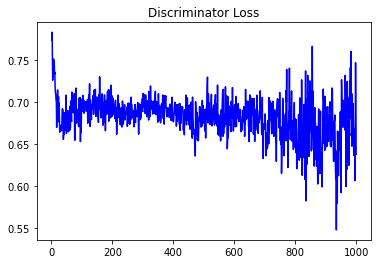

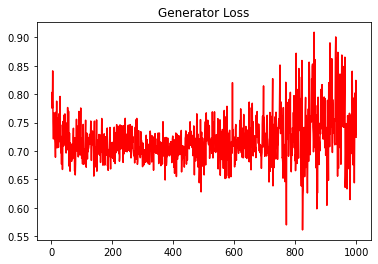

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.8378305065892637


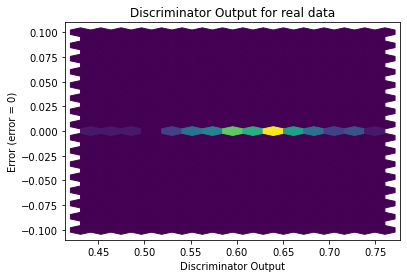

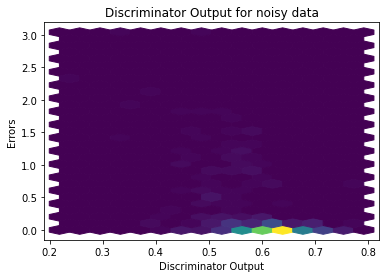

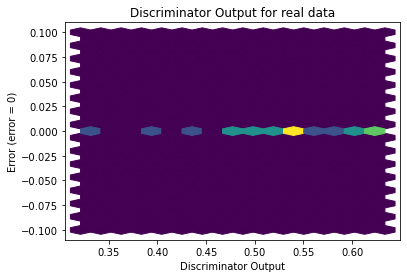

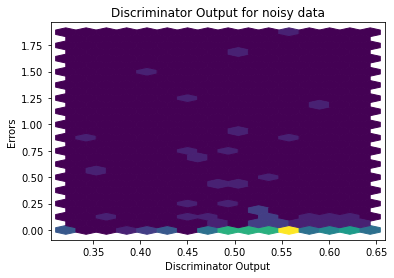

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

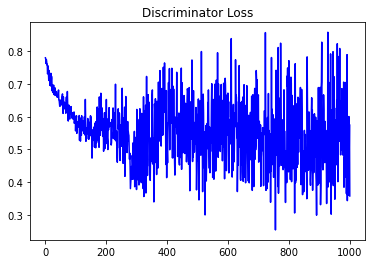

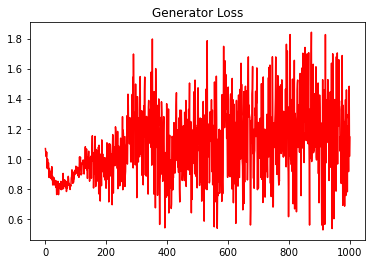

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.0661001555453986


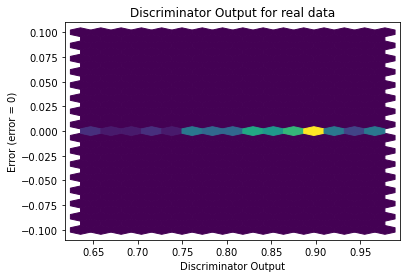

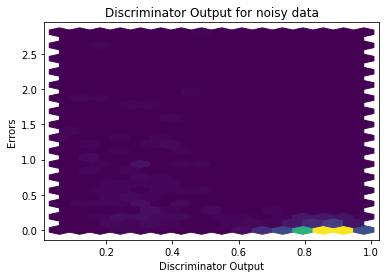

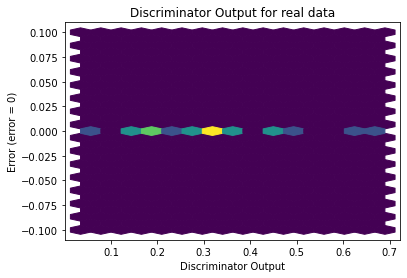

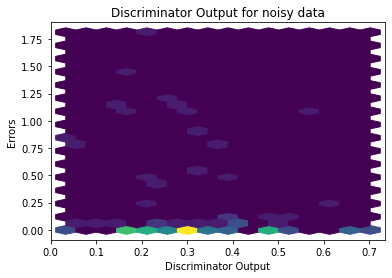

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


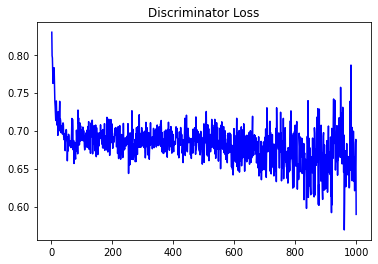

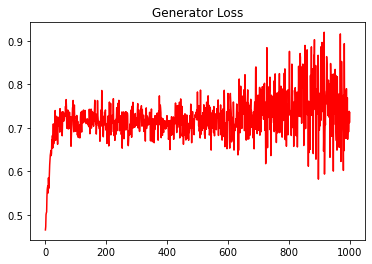

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
1.574108339291066


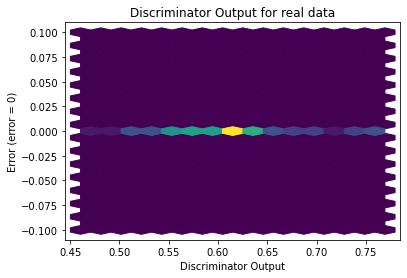

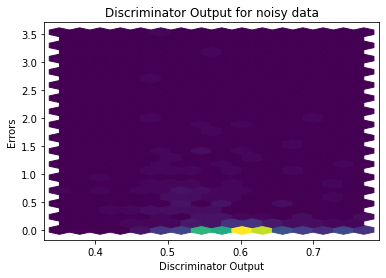

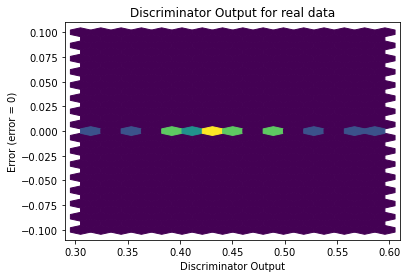

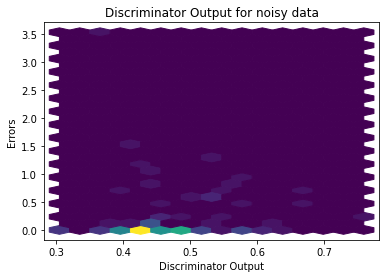

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


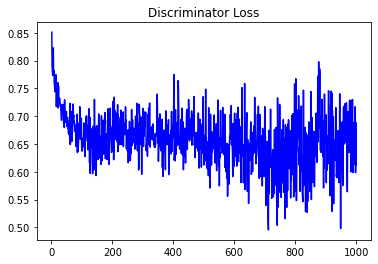

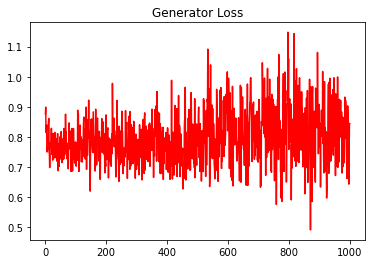

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
1.6306622680164873


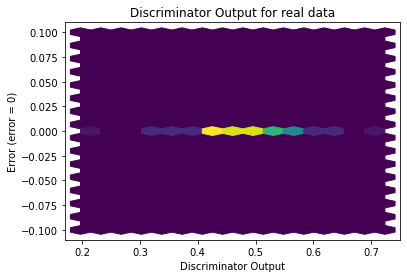

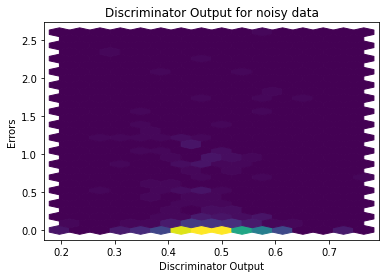

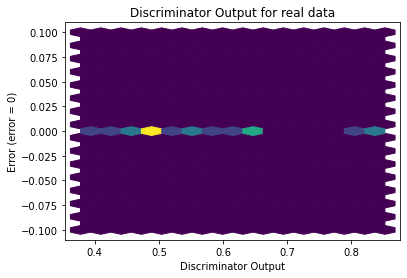

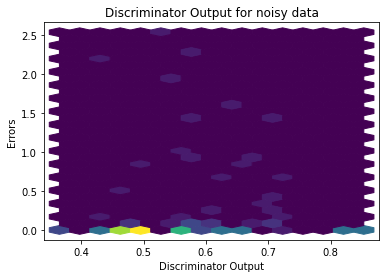

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1382]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3163]], requires_grad=True)
